<a href="https://colab.research.google.com/github/cunhamaicon/churn_modelling_deepaz/blob/master/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Modelling

---


**Autor: Maicon Henrique Cunha**

**email: maiconhenrique@hotmail.com**

**Github: [https://github.com/cunhamaicon](https://github.com/cunhamaicon/)**


---

Nesse trabalho trataremos do problema de churn. Serão criadas duas redes neurais para modelar a saída ou não de pessoas de um banco. O objetivo é identificar por qual motivo um usuário está deixando o banco e prever quando um novo usuário que não fez parte do conjunto de treinamento está próximo de deixar o banco. Ao final serão feitas observações e análises sobre os modelos e será tomada a decisão de qual modelo utilizar.
<br><br>

O banco de dados ficitício utlizado para esse projeto originalmente encontra-se [aqui](https://www.superdatascience.com/pages/deep-learning).
<br><br>
 Esse tipo de problema é muito comum em qualquer área e a abordagem utilizada aqui é geral.
<br><br>

Todo o código foi feito no Colab e pode ser executado on-line em [https://colab.research.google.com/](https://colab.research.google.com/).




## Obtendo informações sobre o banco:

### Porcentagem de usuários que deixaram o banco por gênero

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/genero.jpg?raw=true)

###Porcentagem de usuários que deixaram o banco por país:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/geografia.jpg?raw=true)

### Usuários com cartão

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/cartao.jpg?raw=true)

###Usuários ativos

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/ativo.jpg?raw=true)

###Número de produtos

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/num_produtos.jpg?raw=true)

### Score

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/score.jpg?raw=true)

###Idade

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/idade.jpg?raw=true)

### Balanço

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/balanco.jpg?raw=true)

### Salário estimado

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/salario.jpg?raw=true)

### Tempo de permanência

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/permanencia.jpg?raw=true)

## Procedimentos iniciais

### Clone da pasta

In [1]:
!git clone https://github.com/cunhamaicon/churn_modelling_deepaz

Cloning into 'churn_modelling_deepaz'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


Visualizando as informações da pasta clonada:

In [2]:
 ls churn_modelling_deepaz

Churn_Modelling.csv


### Importação de pacotes

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Criação do dataset

In [0]:
datadir='churn_modelling_deepaz'
dataset = pd.read_csv(os.path.join(datadir, "Churn_Modelling.csv"))
pd.set_option('display.max_colwidth',-1)

Visualizando o cabeçalho do banco:

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Visualizando informações do banco:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Como podemos observar se trata de um banco com dez mil usuários onde todas as entradas são não nulas

### Tratamento do banco

Exluindo colunas que não serão utilizadas:

In [0]:
dataset = dataset.drop(columns = ['RowNumber','CustomerId','Surname'])

In [8]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Criando dummies das variáveis categóricas "Geography" e "Gender":

In [9]:
dataset = pd.get_dummies(dataset, columns =['Geography','Gender'], drop_first=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Reordenando as colunas do dataset:

In [0]:
cols = list(dataset.columns.values)

In [12]:
cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [0]:
dataset = dataset[
  ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
  'Exited']]

In [14]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0


### Separando Treinamento e teste

Variável de entrada da rede:

In [0]:
X = dataset.iloc[:,:-1].values

Variável de saída da rede:

In [0]:
y = dataset.iloc[:,-1].values

Criando conjuntos de treinamento e teste:

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 0)

### Standard Scaler

Para lidar com dados muito diferentes como "CreditScore" e "Balance" é preciso fazer um escalonamento dos dados. Para isso usamos o StandardScaler que deve utilizar como parâmetro o cojunto de treinamento e aplicado tanto no cokunto de treinamento como de teste.

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN - Teste1

Criando uma rede neural composta por duas camadas intermediárias com seis neurônios em camada camada intermediária e duas camadas dropout intermediárias para evitar overfitting:

In [0]:
classifier1 = Sequential()

classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier1.add(Dropout(0.1))
classifier1.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier1.add(Dropout(0.1))
classifier1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier1.compile(Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Visualizando as informações da rede criada:

In [25]:
classifier1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Treinando o modelo:

In [26]:
history = classifier1.fit(X_train, y_train, batch_size = 10, epochs = 30,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 6s 711us/step - loss: 0.4882 - acc: 0.7960 - val_loss: 0.4310 - val_acc: 0.7975
Epoch 2/30
8000/8000 [==============================] - 3s 334us/step - loss: 0.4362 - acc: 0.7960 - val_loss: 0.4269 - val_acc: 0.7975
Epoch 3/30
8000/8000 [==============================] - 3s 376us/step - loss: 0.4309 - acc: 0.7960 - val_loss: 0.4212 - val_acc: 0.7975
Epoch 4/30
8000/8000 [==============================] - 3s 392us/step - loss: 0.4296 - acc: 0.7960 - val_loss: 0.4176 - val_acc: 0.7975
Epoch 5/30
8000/8000 [==============================] - 3s 329us/step - loss: 0.4249 - acc: 0.8095 - val_loss: 0.4158 - val_acc: 0.8210
Epoch 6/30
8000/8000 [==============================] - 3s 331us/step - loss: 0.4259 - acc: 0.8245 - val_loss: 0.4145 - val_acc: 0.8310
Epoch 7/30
8000/8000 [==============================] - 3s 328us/step - loss: 0.4276 - a

### Análise Teste 1

Erro e acurácia nos conjunto de treinamento e validação:

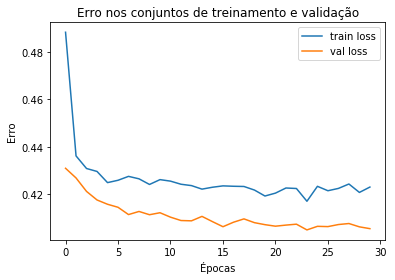

In [27]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Erro nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.show()

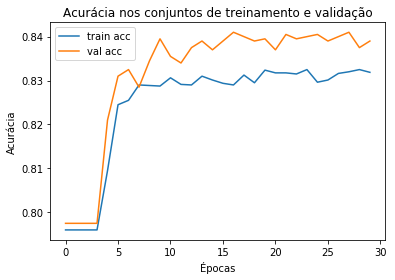

In [28]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.title("Acurácia nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()

Visualização da matriz de confusão no conjunto de testes:

In [0]:
y_pred = classifier1.predict(X_test)

Curva Roc do modelo:

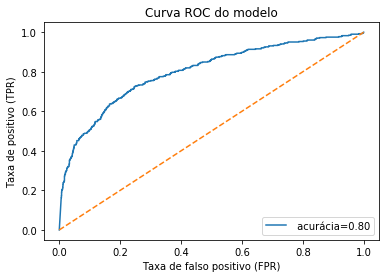

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=" acurácia="+str(auc)[:4])
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de positivo (TPR)")
plt.title("Curva ROC do modelo")
plt.show()

Criando a matriz de Confusão

In [0]:
y_pred = (y_pred > 0.5)

In [0]:
cm = confusion_matrix(y_test, y_pred)

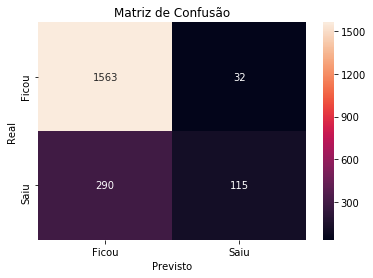

In [35]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')

ax.set_xlabel('Previsto');ax.set_ylabel('Real'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Ficou', "Saiu"]); ax.yaxis.set_ticklabels(['Ficou',"Saiu"])
plt.show()

## ANN - Teste2

Craiando um modelo com uma única camada com dez neurônios:

In [0]:
classifier2 = Sequential()
classifier2.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier2.compile(RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Informações da rede:

In [37]:
print(classifier2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history2 = classifier2.fit(X_train, y_train, batch_size = 10, epochs = 30,validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 2s 296us/step - loss: 0.4951 - acc: 0.7950 - val_loss: 0.4215 - val_acc: 0.7980
Epoch 2/30
8000/8000 [==============================] - 2s 257us/step - loss: 0.4184 - acc: 0.8150 - val_loss: 0.4062 - val_acc: 0.8385
Epoch 3/30
8000/8000 [==============================] - 2s 256us/step - loss: 0.4053 - acc: 0.8289 - val_loss: 0.3954 - val_acc: 0.8370
Epoch 4/30
8000/8000 [==============================] - 2s 257us/step - loss: 0.3956 - acc: 0.8312 - val_loss: 0.3871 - val_acc: 0.8395
Epoch 5/30
8000/8000 [==============================] - 2s 259us/step - loss: 0.3893 - acc: 0.8314 - val_loss: 0.3807 - val_acc: 0.8370
Epoch 6/30
8000/8000 [==============================] - 2s 256us/step - loss: 0.3841 - acc: 0.8332 - val_loss: 0.3758 - val_acc: 0.8375
Epoch 7/30
8000/8000 [==============================] - 2s 255us/step - loss: 0.3812 - acc: 0.8326 - val_loss: 0.3736 - val_acc: 0.8355


### Análise Teste 2

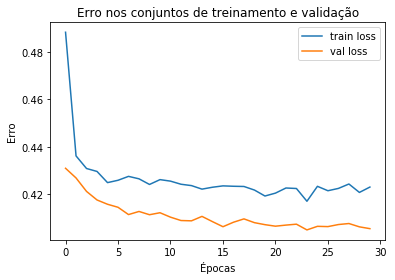

In [39]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Erro nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.show()

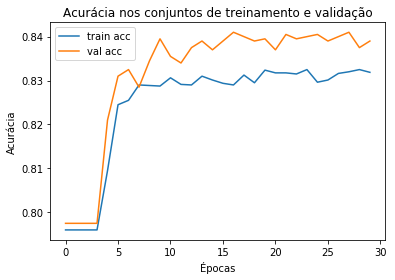

In [40]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.title("Acurácia nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()

Criando a curva roc do modelo:

In [0]:
y_pred = classifier2.predict(X_test)

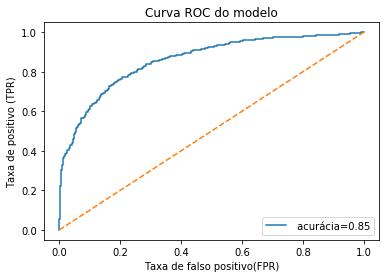

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=" acurácia="+str(auc)[:4])
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taxa de falso positivo(FPR)")
plt.ylabel("Taxa de positivo (TPR)")
plt.title("Curva ROC do modelo")
plt.show()

Criação da matriz de confusão

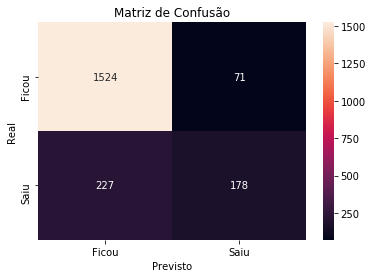

In [44]:
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')

ax.set_xlabel('Previsto');ax.set_ylabel('Real'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Ficou', "Saiu"]); ax.yaxis.set_ticklabels(['Ficou',"Saiu"])
plt.show()

## Observações sobre os modelos:



1.   Se quisermos levar em conta apenas a precisão do modelo claramente o classificador do teste 2 leva vantagem e deve ser escolhido. 
2.   O classificador 1 possui mais número de falsos negativos, usuários que foram classificados para não deixar o banco mas que na verdade deixaram.
3.  O classificador 2 possui mais número de falsos positivos, usuários que foram classificados para deixar o banco mas que na verdade não saíram.
4. O conjunto de dados é desbalanceado e o classificador 2 previu um total maior de usuários que deixaram o banco, conseguindo lidar com essa dificuldade, por isso a performance melhor e deve ser utilizado.
